In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
DATA_FOLDER = "data"
FOLDERS = ["folder_1", "folder_2"]

In [8]:
print("################################ Analyse des fichiers csv ################################")
for folder in FOLDERS:
    print(f"############################## Analyse du dossier {folder} ###############################")
    files = os.listdir(f"{DATA_FOLDER}/{folder}")
    column_names = []
    for file in files:
        print(f"#### Analyse du fichier {file}")
        df = pd.read_csv(f"{DATA_FOLDER}/{folder}/{file}", index_col=0)
        column_names.append(tuple(df.columns))
        print("Shape :", df.shape)
    print("Analyse des noms de colonnes")
    columns_names_distinct = set(column_names)
    print(len(columns_names_distinct), "type(s) of column names")
    for column_name in columns_names_distinct:
        print("Column names :", column_name)

################################ Analyse des fichiers csv ################################
############################## Analyse du dossier folder_1 ###############################
#### Analyse du fichier 1_1.csv
Shape : (46691, 12)
#### Analyse du fichier 1_2.csv
Shape : (46688, 12)
#### Analyse du fichier 2_1.csv
Shape : (46689, 12)
#### Analyse du fichier 2_2.csv
Shape : (46688, 12)
#### Analyse du fichier 3_1.csv
Shape : (43080, 12)
#### Analyse du fichier 3_2.csv
Shape : (43099, 12)
#### Analyse du fichier 3_3.csv
Shape : (43078, 12)
#### Analyse du fichier labels.csv
Shape : (29, 7)
Analyse des noms de colonnes
2 type(s) of column names
Column names : ('driver_StreamingMetrics_streaming_lastCompletedBatch_processingDelay_value', 'driver_StreamingMetrics_streaming_lastCompletedBatch_schedulingDelay_value', 'driver_StreamingMetrics_streaming_lastReceivedBatch_records_value', 'driver_BlockManager_memory_memUsed_MB_value', 'driver_jvm_heap_used_value', 'driver_StreamingMetrics_strea

In [14]:
df = pd.read_csv(f"{DATA_FOLDER}/{FOLDERS[0]}/labels.csv", index_col=0)
df.head(10)

,trace_id,ano_id,ref_start,ref_end,ano_start,ano_end,ano_type
0,1_1,0,4247,6193,6193,7166,bursty_input
1,1_1,1,11425,13393,13393,14377,bursty_input
2,1_1,2,18659,20593,20593,21560,bursty_input
3,1_1,3,25849,27793,27793,28765,bursty_input
4,1_1,4,33049,34993,34993,35965,bursty_input
5,1_1,5,40257,42193,42193,43161,bursty_input
6,1_2,0,5055,6989,6989,7956,bursty_input
7,1_2,1,13025,14989,14989,15971,bursty_input
8,1_2,2,21043,22989,22989,23962,bursty_input
9,1_2,3,29033,30989,30989,31967,bursty_input


In [78]:
df = pd.read_csv(f"{DATA_FOLDER}/{FOLDERS[0]}/1_1.csv", index_col=0)
df.head()

,driver_StreamingMetrics_streaming_lastCompletedBatch_processingDelay_value,driver_StreamingMetrics_streaming_lastCompletedBatch_schedulingDelay_value,driver_StreamingMetrics_streaming_lastReceivedBatch_records_value,driver_BlockManager_memory_memUsed_MB_value,driver_jvm_heap_used_value,driver_StreamingMetrics_streaming_totalCompletedBatches_value_1_diff,avg_jvm_heap_used_value,avg_executor_filesystem_hdfs_write_ops_value_1_diff,avg_executor_cpuTime_count_1_diff,avg_executor_runTime_count_1_diff,avg_executor_shuffleRecordsRead_count_1_diff,avg_executor_shuffleRecordsWritten_count_1_diff
0,2245.0,0.0,2808000.0,2100.0,1.095197e+09,0.0,2.665584e+09,0.0,0.000000e+00,0.0,0.0,0.0
1,2245.0,0.0,2808000.0,2134.0,1.100890e+09,0.0,2.690258e+09,0.0,0.000000e+00,0.0,0.0,0.0
2,2245.0,0.0,2808000.0,2200.0,1.106092e+09,0.0,2.731373e+09,0.0,0.000000e+00,0.0,0.0,0.0
3,2245.0,0.0,2496000.0,2265.0,1.128138e+09,0.0,2.116565e+09,0.0,4.837354e+08,486.0,0.0,8302.0
4,2245.0,0.0,2496000.0,2299.0,1.165589e+09,0.0,2.580707e+09,40.0,1.146078e+09,1529.0,25885.0,9968.0


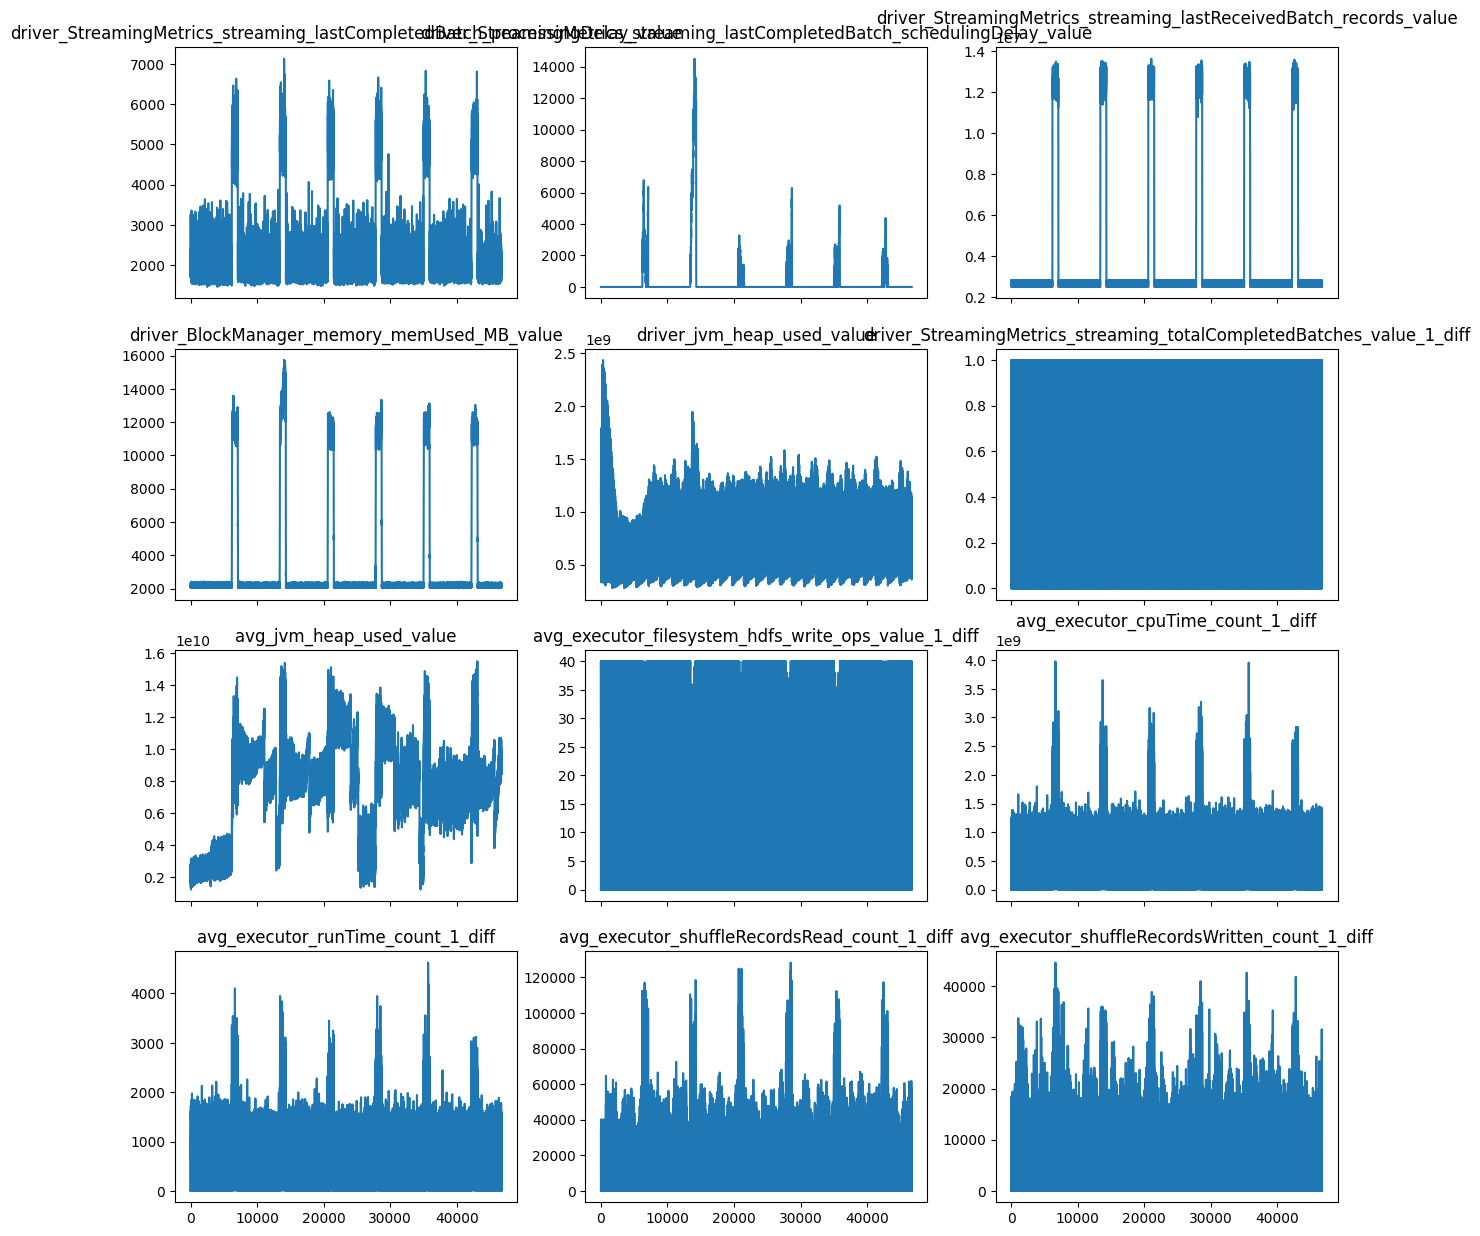

In [79]:
fig, axs = plt.subplots(4,3, figsize=(15, 15), sharex=True)
axs =axs.flatten()

for i, col in enumerate(df.columns):
    axs[i].plot(df.index, df[col])
    axs[i].set_title(col)

plt.show()

In [17]:
from script_1 import *

In [23]:
anomalies = pd.read_csv(f"{DATA_FOLDER}/{FOLDERS[0]}/labels.csv", index_col=0)
selected_anomalies = anomalies[anomalies["trace_id"] == "1_1"]
selected_anomalies

,trace_id,ano_id,ref_start,ref_end,ano_start,ano_end,ano_type
0,1_1,0,4247,6193,6193,7166,bursty_input
1,1_1,1,11425,13393,13393,14377,bursty_input
2,1_1,2,18659,20593,20593,21560,bursty_input
3,1_1,3,25849,27793,27793,28765,bursty_input
4,1_1,4,33049,34993,34993,35965,bursty_input
5,1_1,5,40257,42193,42193,43161,bursty_input


In [24]:
selected_anomalies["ref_start"]

0     4247
1    11425
2    18659
3    25849
4    33049
5    40257
Name: ref_start, dtype: int64

In [44]:
data_1_1 = pd.read_csv(f"{DATA_FOLDER}/{FOLDERS[0]}/1_1.csv", index_col=0)
print(data_1_1.shape)
data_1_1.head()

(46691, 12)


,driver_StreamingMetrics_streaming_lastCompletedBatch_processingDelay_value,driver_StreamingMetrics_streaming_lastCompletedBatch_schedulingDelay_value,driver_StreamingMetrics_streaming_lastReceivedBatch_records_value,driver_BlockManager_memory_memUsed_MB_value,driver_jvm_heap_used_value,driver_StreamingMetrics_streaming_totalCompletedBatches_value_1_diff,avg_jvm_heap_used_value,avg_executor_filesystem_hdfs_write_ops_value_1_diff,avg_executor_cpuTime_count_1_diff,avg_executor_runTime_count_1_diff,avg_executor_shuffleRecordsRead_count_1_diff,avg_executor_shuffleRecordsWritten_count_1_diff
0,2245.0,0.0,2808000.0,2100.0,1.095197e+09,0.0,2.665584e+09,0.0,0.000000e+00,0.0,0.0,0.0
1,2245.0,0.0,2808000.0,2134.0,1.100890e+09,0.0,2.690258e+09,0.0,0.000000e+00,0.0,0.0,0.0
2,2245.0,0.0,2808000.0,2200.0,1.106092e+09,0.0,2.731373e+09,0.0,0.000000e+00,0.0,0.0,0.0
3,2245.0,0.0,2496000.0,2265.0,1.128138e+09,0.0,2.116565e+09,0.0,4.837354e+08,486.0,0.0,8302.0
4,2245.0,0.0,2496000.0,2299.0,1.165589e+09,0.0,2.580707e+09,40.0,1.146078e+09,1529.0,25885.0,9968.0


In [40]:
#data_1_1.reset_index(names = "timestamp", inplace=True)
#data_1_1["timestamp"] = data_1_1["timestamp"].astype(int)

In [51]:
selected_anomalies

,trace_id,ano_id,ref_start,ref_end,ano_start,ano_end,ano_type
0,1_1,0,4247,6193,6193,7166,bursty_input
1,1_1,1,11425,13393,13393,14377,bursty_input
2,1_1,2,18659,20593,20593,21560,bursty_input
3,1_1,3,25849,27793,27793,28765,bursty_input
4,1_1,4,33049,34993,34993,35965,bursty_input
5,1_1,5,40257,42193,42193,43161,bursty_input


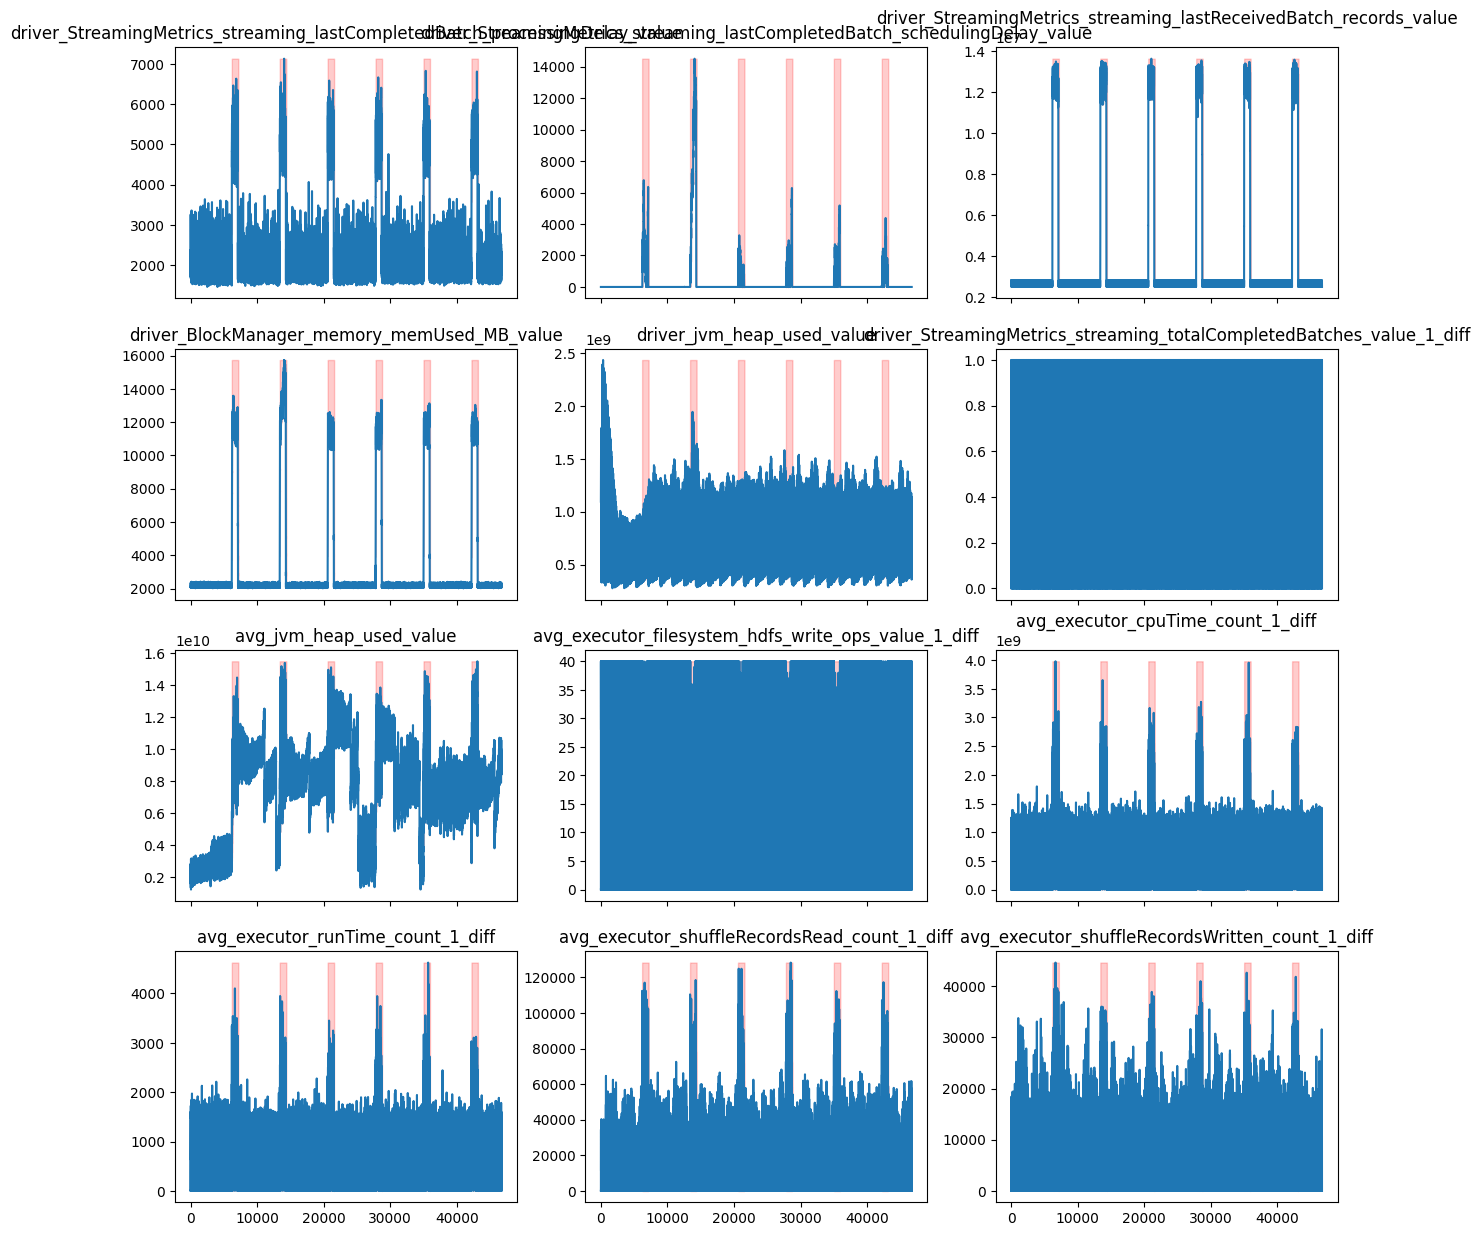

In [93]:
fig, axs = plt.subplots(4,3, figsize=(15, 15), sharex=True)
axs =axs.flatten()

for i, col in enumerate(data_1_1.columns):
    axs[i].plot(data_1_1.index, data_1_1[col])
    axs[i].set_title(col)
    for ano in selected_anomalies.iterrows():
        #axs[i].axvline(x=ano[1]["ref_start"], color="green", label="Ref start")
        #axs[i].axvline(x=ano[1]["ano_start"], color="red", label="Ano start")
        #axs[i].axvline(x=ano[1]["ano_end"], color="red", label="Ano end")
        axs[i].fill_between(data_1_1.index, y1 = data_1_1[col], y2=data_1_1[col].max(), where=(data_1_1.index>ano[1]["ano_start"]) & (data_1_1.index<ano[1]["ano_end"]), alpha=0.2, color="red", label="Ano zone")
    

plt.show()

In [57]:
refs = []
anos = []
for i in selected_anomalies.index:
    selection_ref = data_1_1[data_1_1.index > selected_anomalies["ref_start"][i]]
    selection_ref = data_1_1[data_1_1.index < selected_anomalies["ref_end"][i]]
    selection_ano = data_1_1[data_1_1.index > selected_anomalies["ano_start"][i]]
    selection_ano = data_1_1[data_1_1.index < selected_anomalies["ano_end"][i]]

    refs.append(selection_ref.agg("mean").head())
    anos.append(selection_ano.agg("mean").head())
    

In [58]:
pd.DataFrame(refs)

,driver_StreamingMetrics_streaming_lastCompletedBatch_processingDelay_value,driver_StreamingMetrics_streaming_lastCompletedBatch_schedulingDelay_value,driver_StreamingMetrics_streaming_lastReceivedBatch_records_value,driver_BlockManager_memory_memUsed_MB_value,driver_jvm_heap_used_value
0,2135.797675,0.214597,2.602187e+06,2201.027127,7.859609e+08
1,2281.715075,151.307623,3.261223e+06,2839.174718,7.933147e+08
2,2311.175205,447.959986,3.462661e+06,3100.182732,8.019159e+08
3,2315.047998,357.365668,3.559810e+06,3162.657252,8.077370e+08
4,2318.568028,312.148344,3.616859e+06,3201.303346,8.093526e+08
5,2324.509895,294.565426,3.654495e+06,3230.453203,8.102537e+08


In [59]:
pd.DataFrame(anos)

,driver_StreamingMetrics_streaming_lastCompletedBatch_processingDelay_value,driver_StreamingMetrics_streaming_lastCompletedBatch_schedulingDelay_value,driver_StreamingMetrics_streaming_lastReceivedBatch_records_value,driver_BlockManager_memory_memUsed_MB_value,driver_jvm_heap_used_value
0,2499.993581,282.664946,3.833868e+06,3402.684901,7.772717e+08
1,2456.054810,641.584684,3.834666e+06,3495.458927,8.034607e+08
2,2418.329824,460.640863,3.836599e+06,3444.876391,8.026924e+08
3,2397.741213,379.707109,3.836546e+06,3421.423466,8.082840e+08
4,2385.052329,345.553594,3.836692e+06,3411.349840,8.089265e+08
5,2379.167350,312.080976,3.836893e+06,3401.973008,8.097894e+08
